# **1. Importing Libraries and Loading Dataset**

In [38]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
%matplotlib inline
# For more plotting options
import seaborn as sns
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
# For machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import time
from math import sqrt
# setting up output limit 
pd.set_option('max_rows', None) # Set value to print max 25 rows of dataframe in output
pd.set_option('display.max_columns', None) # set value at 'None' to print unlimited column elements in output

In [2]:
# Loading file from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**There are 29 features to describe appliances energy use :**

1. date : time year-month-day hour:minute:second

2. lights : energy use of light fixtures in the house in Wh

3. T1 : Temperature in kitchen area, in Celsius

4. T2 : Temperature in living room area, in Celsius

5. T3 : Temperature in laundry room area

6. T4 : Temperature in office room, in Celsius

7. T5 : Temperature in bathroom, in Celsius

8. T6 : Temperature outside the building (north side), in Celsius

9. T7 : Temperature in ironing room, in Celsius

10. T8 : Temperature in teenager room 2, in Celsius

11. T9 : Temperature in parents’ room, in Celsius

12. T_out : Temperature outside (from Chievres weather station), in Celsius

13. Tdewpoint : (from Chievres weather station), Â°C

14. RH_1 : Humidity in kitchen area, in %

15. RH_2 : Humidity in living room area, in %

16. RH_3 : Humidity in laundry room area, in %

17. RH_4 : Humidity in office room, in %

18. RH_5 : Humidity in bathroom, in %

19. RH_6 : Humidity outside the building (north side), in %

20. RH_7 : Humidity in ironing room, in %

21. RH_8 : Humidity in teenager room 2, in %

22. RH_9 : Humidity in parents’ room, in %

23. RH_out :Humidity outside (from Chievres weather station), in %

24. Pressure : (from Chievres weather station), in mm Hg

25. Wind speed: (from Chievres weather station), in m/s

26. Visibility :(from Chievres weather station), in km

27. Rv1 :Random variable 1, non-dimensional

28. Rv2 :Random variable 2, non-dimensional

29. Appliances : Total energy used by appliances, in Wh

In [31]:
# File Directory path 
file_path = '/content/drive/MyDrive/EDA Projects/Regression_Capstone_Project/data_application_energy.csv'

# Appliance_Energy data file
appliance_data = pd.read_csv(file_path, parse_dates=['date'])

# Shape of data.
print(f'Diamentions: {appliance_data.shape[0]} x {appliance_data.shape[1]}')

Diamentions: 19735 x 29


In [32]:
appliance_data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [33]:
appliance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

Number of entries : 19735

Independent variables : 28 (11 temperature, 10 humidity, 1 pressure, 2 randoms)

Dependent variable : 1 (Appliances)

All features are numerical. No categorical variables. There seems to be no null values in our data set.

# **2. Exploratory Data Analysis**

> **Time_Series Data**

In [39]:
# creating a copy of main dataframe
appliance_data_2 = appliance_data.copy()

In [40]:
# Taking out the required info from date variable and making new columns
appliance_data_2['hour'] = pd.to_datetime(appliance_data_2['date']).dt.hour
appliance_data_2['month'] = pd.to_datetime(appliance_data_2['date']).dt.month

# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact
appliance_data_2['weekday'] = ((pd.to_datetime(appliance_data_2['date']).dt.dayofweek)// 5 == 0).astype(int)

In [41]:
# Shape of data.
print(f'Diamentions: {appliance_data_2.shape[0]} x {appliance_data_2.shape[1]}\n')

Diamentions: 19735 x 32



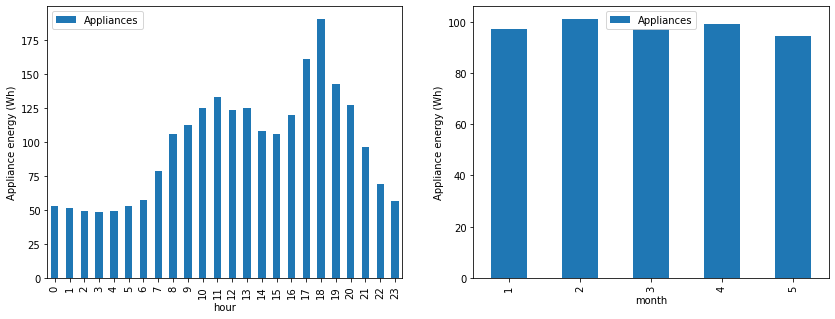

In [43]:
# focussed displots for hours
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
appliance_data_2.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar(ax=ax1)
ax1.set_ylabel('Appliance energy (Wh)')

# focussed displots for Month
appliance_data_2.groupby('month').agg({'Appliances' : 'mean'}).plot.bar(ax=ax2)
ax2.set_ylabel('Appliance energy (Wh)')
plt.show()

**From Above figure, we can observe the average energy consumption of appliances at different time of the day in the span of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 18 PM is comparatively higher and sharper.**

**We observe that over the sleeping hours (11 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.** 

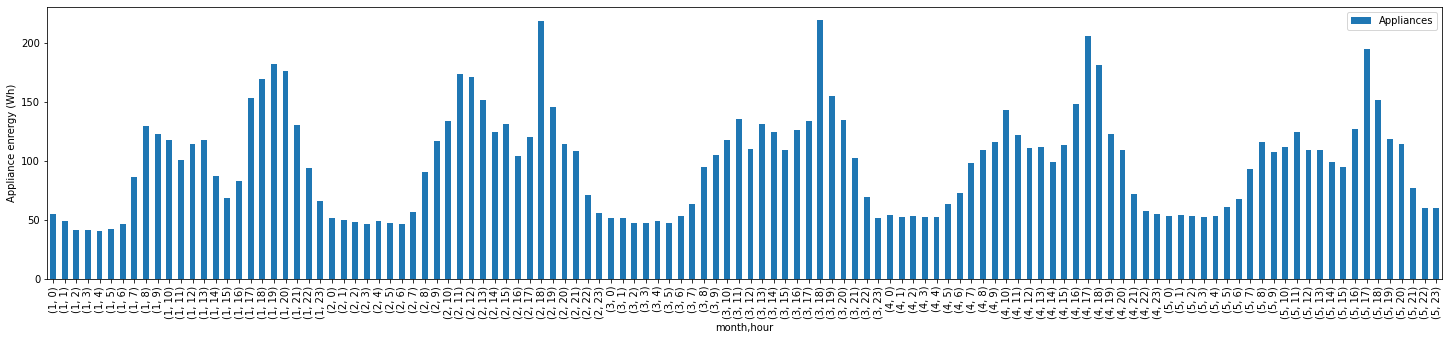

In [44]:
# focussed displots for Month-hour vs energy load plot
fig, ax = plt.subplots(1,1,figsize=(25,5))
appliance_data_2.groupby(['month','hour']).agg({'Appliances' : 'mean'}).plot.bar(ax=ax)
ax.set_ylabel('Appliance enrergy (Wh)')
plt.show()

**Above is the Hour-Month trend of the energy consumption of appliances. Above pattern resemblels similar traits with Average Hourly consuption plot. We can say that the pattern is quite repeatative because of the same fact that As in sleeping hours (11 PM - 6 AM) the energy consumption of appliances is lowest at around 50Wh and above 100 Wh in Evening (5PM - 10 PM).**

**Energy consumption in Weekends and Weekdays**

As per defination, Saturday and Sunday especially regarded as a time for leisure or Weekends. And rest of the days, are considered as working days or Weekdays. A week starts with Monday and ends with Sunday, i.e. 0 to 6.

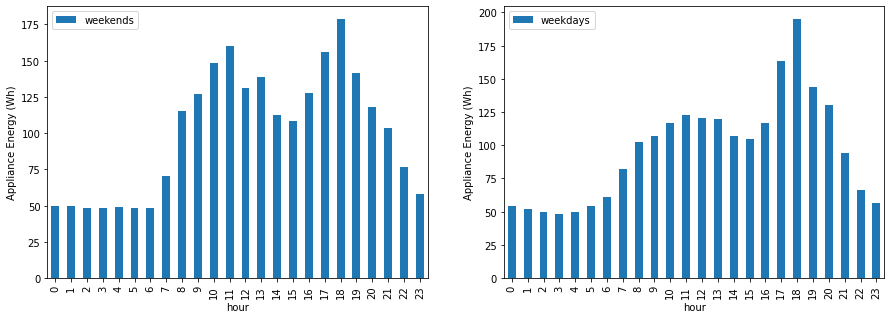

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
# creating hourly wise week data 
week_df = appliance_data_2.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
# Filtering weekends and weekdays from dataframe
week_df[week_df.weekday== 0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday== 1].Appliances.plot.bar(ax=ax[1], label='weekdays')

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_ylabel('Appliance Energy (Wh)')
ax[1].set_ylabel('Appliance Energy (Wh)')
plt.show()

**We observe that the energy consumption of appliances during the office hours (8 AM - 4 PM) is higher in weekends compared to the weekdays. Also, average overall consumption is higher in weekends is pretty high.**

**Lets look at how temperature and humidity levels vary inside different rooms !**

> **Temperature Data**

In [ ]:
# Removing 'lights' column
appliance_data_2 = appliance_data_2.drop(columns = ['lights'])

In [26]:
# Saparating the Temperature values from the data and renaming them
temperature_data = {'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
                    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
                    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'}

appliance_data_2 = appliance_data_2.rename(columns = temperature_data)
# Checking out the statistical data of the temperature related columns
appliance_data_2[temperature_data.values()].describe()

,temp_kitchen,temp_living,temp_laundry,temp_office,temp_bath,temp_outside,temp_iron,temp_teen,temp_parents,temp_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


**OBSERVATIONS :**

1.   Average outside temperature over a period of 4.5 months is around 7.5 degrees. It ranges from -6 - 28 degrees
2.   While average temperature inside the building has been around 20 degrees for all the rooms. It ranges from 14 - 30 degrees
3.   Which implies, Warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation between temperature and consumption of energy inside house.

> **Humidity Data**

In [27]:
# Saparating the Humidity values from the data and renaming them
Humidity_data = {'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
                 'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
                 'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'}

appliance_data_2 = appliance_data_2.rename(columns = Humidity_data)
# Checking out the statistical data of the Humidity related columns
appliance_data_2[Humidity_data.values()].describe()

,humid_kitchen,humid_living,humid_laundry,humid_office,humid_bath,humid_outside,humid_iron,humid_teen,humid_parents,humid_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


**OBSERVATIONS :**

1.   Average humidity outside the building has been higher than the average humidity inside.
2.   Average humidity at the weather station is significantly higher compared to outside humidity near the building.
3.   Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons.
4.   Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings.



> **Weather Data**



In [31]:
Weather_data = appliance_data_2[["Tdewpoint", "Press_mm_hg", "Windspeed", "Visibility"]]

# Checking out the statistical data of the Humidity related columns
Weather_data.describe()

,Tdewpoint,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.760707,755.522602,4.039752,38.330834
std,4.194648,7.399441,2.451221,11.794719
min,-6.600000,729.300000,0.000000,1.000000
25%,0.900000,750.933333,2.000000,29.000000
50%,3.433333,756.100000,3.666667,40.000000
75%,6.566667,760.933333,5.500000,40.000000
max,15.500000,772.300000,14.000000,66.000000


**OBSERVATIONS :**

1.   Average atmospheric pressure outside the building is 755.52
2.   Windspeed can go from nothing to rapid 14m/s


> **Distribution of our appliances energy usage :**



In [33]:
appliance_data_2['Appliances'].unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840])

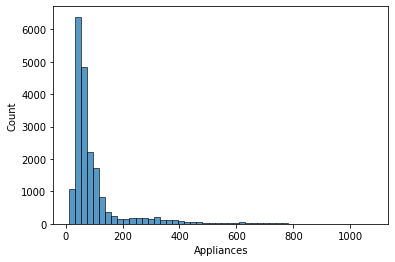

In [35]:
sns.histplot(appliance_data_2['Appliances'], bins=50)
plt.show()

The distrution is right skwed and majority of appliances uses less than 200 Wh of energy. With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.